**1. Import Necessary Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

**2. To read the data into Python.**

In [2]:
college = pd.read_csv('College.csv')
print(college.head())

                     Unnamed: 0 Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

**3. Indexing**
- **Rename column name:- college3 = college.rename ({'Unnamed: 0': 'College'}, axis =1)**
- **Reset the index of ds:- college3 = college3.set_index('College ')**

In [3]:
college3 = college.rename ({'Unnamed: 0': 'College'}, axis =1)
print(college3.head())

college3 = college3.set_index('College')
print(college3.head())

                        College Private  Apps  Accept  Enroll  Top10perc  \
0  Abilene Christian University     Yes  1660    1232     721         23   
1            Adelphi University     Yes  2186    1924     512         16   
2                Adrian College     Yes  1428    1097     336         22   
3           Agnes Scott College     Yes   417     349     137         60   
4     Alaska Pacific University     Yes   193     146      55         16   

   Top25perc  F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  \
0         52         2885          537      7440        3300    450      2200   
1         29         2683         1227     12280        6450    750      1500   
2         50         1036           99     11250        3750    400      1165   
3         89          510           63     12960        5450    450       875   
4         44          249          869      7560        4120    800      1500   

   PhD  Terminal  S.F.Ratio  perc.alumni  Expend  Grad.R

## **Data Analysis**
**4. To produce a numerical summary of the variables in the data set.**

In [4]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


* All attributes have 777 entries, indicating **no missing values** for any of the numerical features.
* For application attribute `Apps`,
    - min = 81,   mean = 3001,    max=48094, std=3870
    - since mean is 30001 and max=48094, there must be potential **outliers** in the `Apps` attribute
* attribute `Accept`, `Enroll`, `F.Undergrad`, `P.Undergrad`, `Outstate`, `Expend` are suspected to be outliers
* Also, Attribute `Grad.Rate` has maximum value of 118 typically says that there is obvious data errors since graduation rate cannot exceed 100%

In [5]:
outlier_suspected_columns = ['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Expend']

**5. Coefficient Of Variation**

In [6]:
print("--- Coefficient of Variation (CV) ---")
for col in outlier_suspected_columns:
    mean = college[col].mean()
    std = college[col].std()
    if mean != 0:
        cv = (std / mean) * 100
        print(f"CV for {col}: {cv:.2f}%")
    else:
        print(f"CV for {col}: Mean is zero, cannot calculate CV.")

--- Coefficient of Variation (CV) ---
CV for Apps: 128.94%
CV for Accept: 121.41%
CV for Enroll: 119.13%
CV for F.Undergrad: 131.10%
CV for P.Undergrad: 178.00%
CV for Outstate: 38.53%
CV for Expend: 54.05%


**6. Median and Mode**

In [7]:
print("--- Median and Mode ---")
for col in outlier_suspected_columns:
    median = college[col].median()
    mode = college[col].mode()
    mean = college[col].mean()
    print(f"{col}:")
    print(f"  Mean: {mean:.2f}")
    print(f"  Median: {median:.2f}")
    # Mode can have multiple values, so print all if any
    if not mode.empty:
        print(f"  Mode: {', '.join(mode.astype(str).tolist())}")
    else:
        print("  Mode: No unique mode found (or multiple modes)")
print("\n")

--- Median and Mode ---
Apps:
  Mean: 3001.64
  Median: 1558.00
  Mode: 440, 663, 1006
Accept:
  Mean: 2018.80
  Median: 1110.00
  Mode: 452
Enroll:
  Mean: 779.97
  Median: 434.00
  Mode: 177, 295
F.Undergrad:
  Mean: 3699.91
  Median: 1707.00
  Mode: 500, 662, 959, 1115, 1306, 1345, 1707
P.Undergrad:
  Mean: 855.30
  Median: 353.00
  Mode: 30
Outstate:
  Mean: 10440.67
  Median: 9990.00
  Mode: 6550
Expend:
  Mean: 9660.17
  Median: 8377.00
  Mode: 4900, 5935, 6333, 6413, 6433, 6562, 6716, 6719, 6898, 6971, 7041, 7114, 7309, 7348, 7762, 7881, 7940, 8118, 8135, 8189, 8324, 8355, 8604, 8686, 8847, 8954, 9084, 9158, 9209, 9431, 10872, 10912, 10922




**7. Skewness Coefficient**

In [8]:
print("--- Skewness Coefficient ---")
for col in outlier_suspected_columns:
    skewness = college[col].skew()
    print(f"Skewness for {col}: {skewness:.2f}")
    if skewness > 0.5:
        print(f"  - {col} is highly right-skewed.")
    elif skewness < -0.5:
        print(f"  - {col} is highly left-skewed.")
    elif skewness >= -0.5 and skewness <= 0.5:
        print(f"  - {col} is fairly symmetrical.")
    else:
        print(f"  - {col} shows moderate skewness.")

--- Skewness Coefficient ---
Skewness for Apps: 3.72
  - Apps is highly right-skewed.
Skewness for Accept: 3.42
  - Accept is highly right-skewed.
Skewness for Enroll: 2.69
  - Enroll is highly right-skewed.
Skewness for F.Undergrad: 2.61
  - F.Undergrad is highly right-skewed.
Skewness for P.Undergrad: 5.69
  - P.Undergrad is highly right-skewed.
Skewness for Outstate: 0.51
  - Outstate is highly right-skewed.
Skewness for Expend: 3.46
  - Expend is highly right-skewed.


**Conclusion of 5,6,7th steps: Presence Of Potential Outliers**

Since,
* Coefficient of Variation of every attribute is higher,
* comparison of Mean, Median and Mode:
    - For `Apps`, Mean > Median > Mode
    - For `Accept`, Mean > Median > Mode
    - For `Enroll`, Mean > Median > Mode
    - For `F.Undergrad`, Mean > Median > Mode
    - For `P.Undergrad`, Mean > Median > Mode
    - For `Outstate`, Mean > Median > Mode
* Skewness Coefficient for every attribute further shows their values are higher than 0.5

We conclude that all these attributes have **potential outliers** and **right-Skewed**. Meaning a few large institutions receive a disproportionately high number.

However, for Expend, multiple values are tied for the highest frequency. This suggests that the mode is not a particularly informative measure of central tendency for this continuous-like attribute. Though, mean > median, we will ensure its skewness through visualizations (histograms and box plots).

**8. Visualizing Distributions**

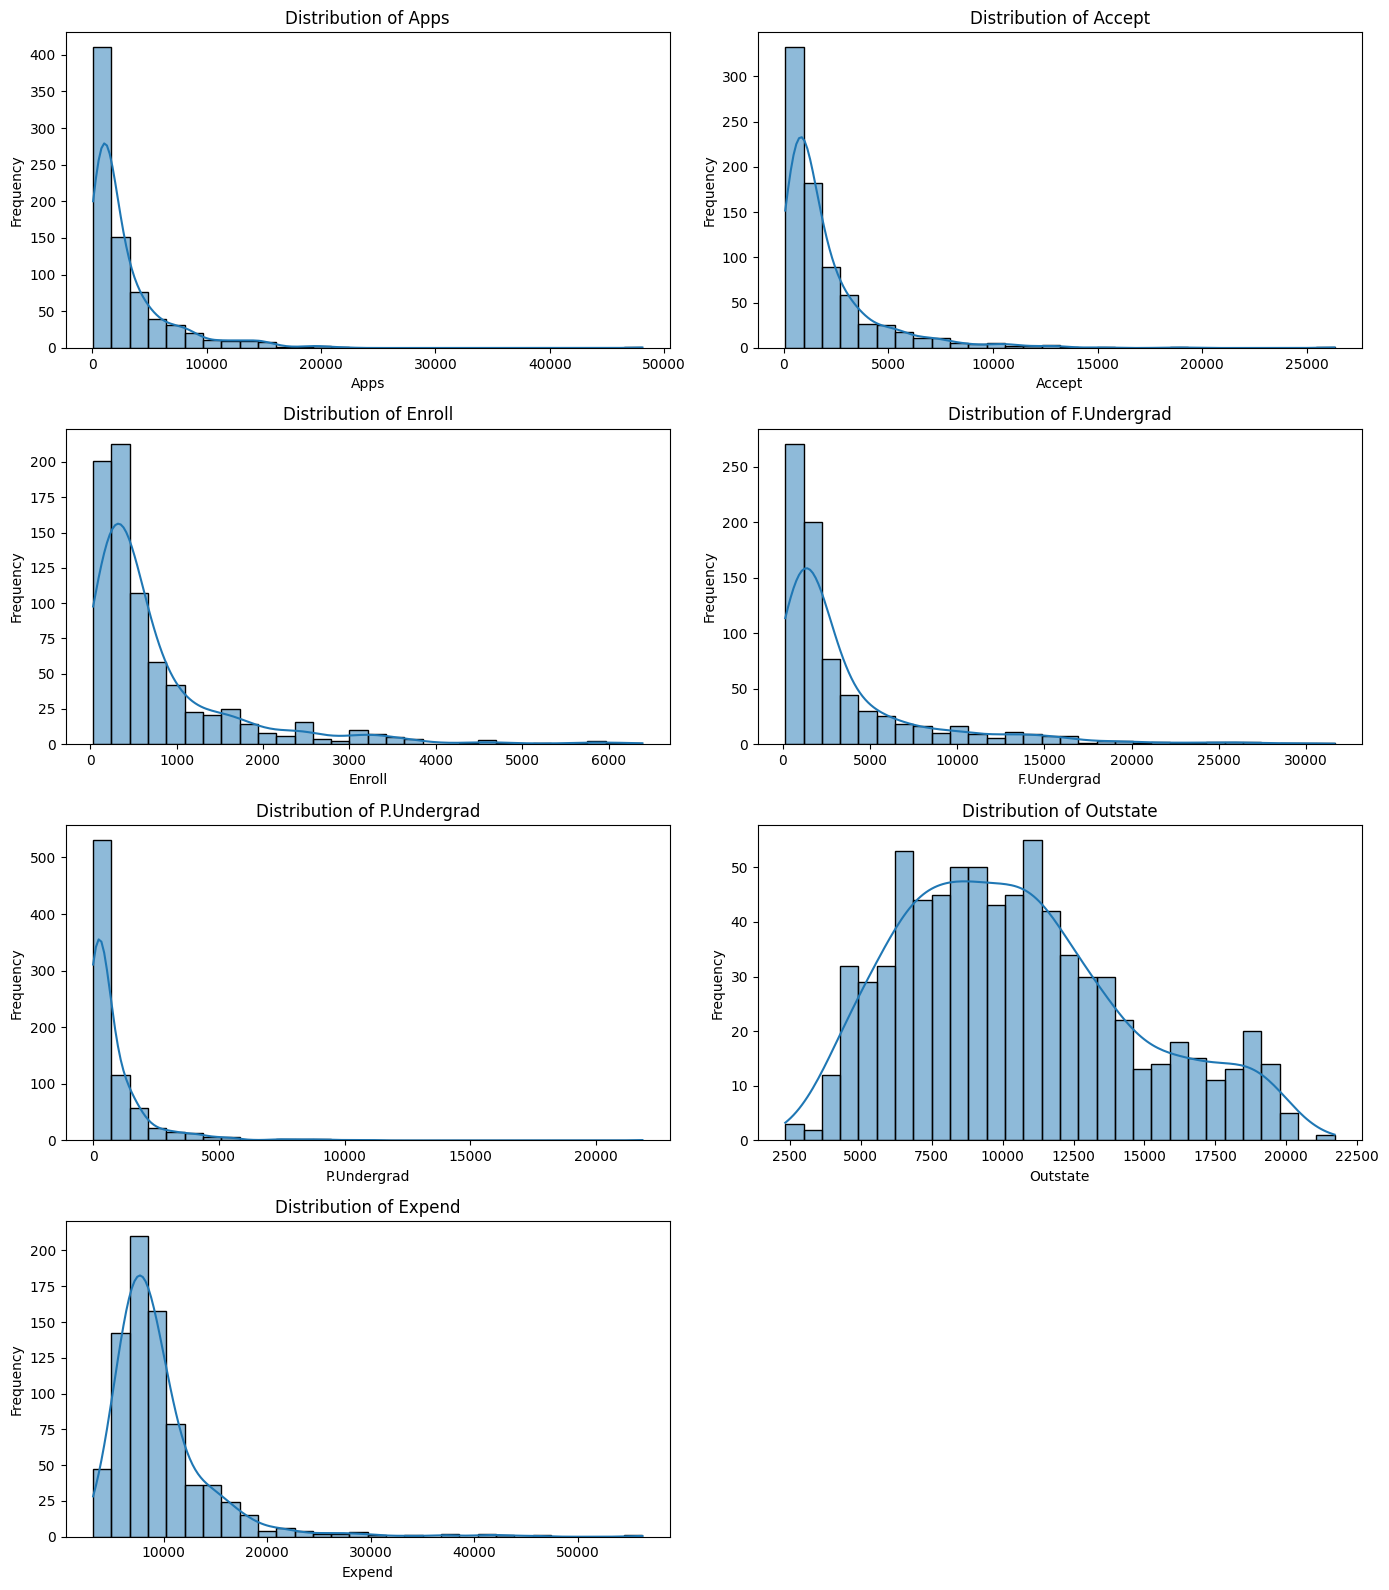

In [ ]:
suspected_numerical_cols = ['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Expend']

i=0
nrows = math.ceil(len(suspected_numerical_cols)/2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(suspected_numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.histplot(college[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

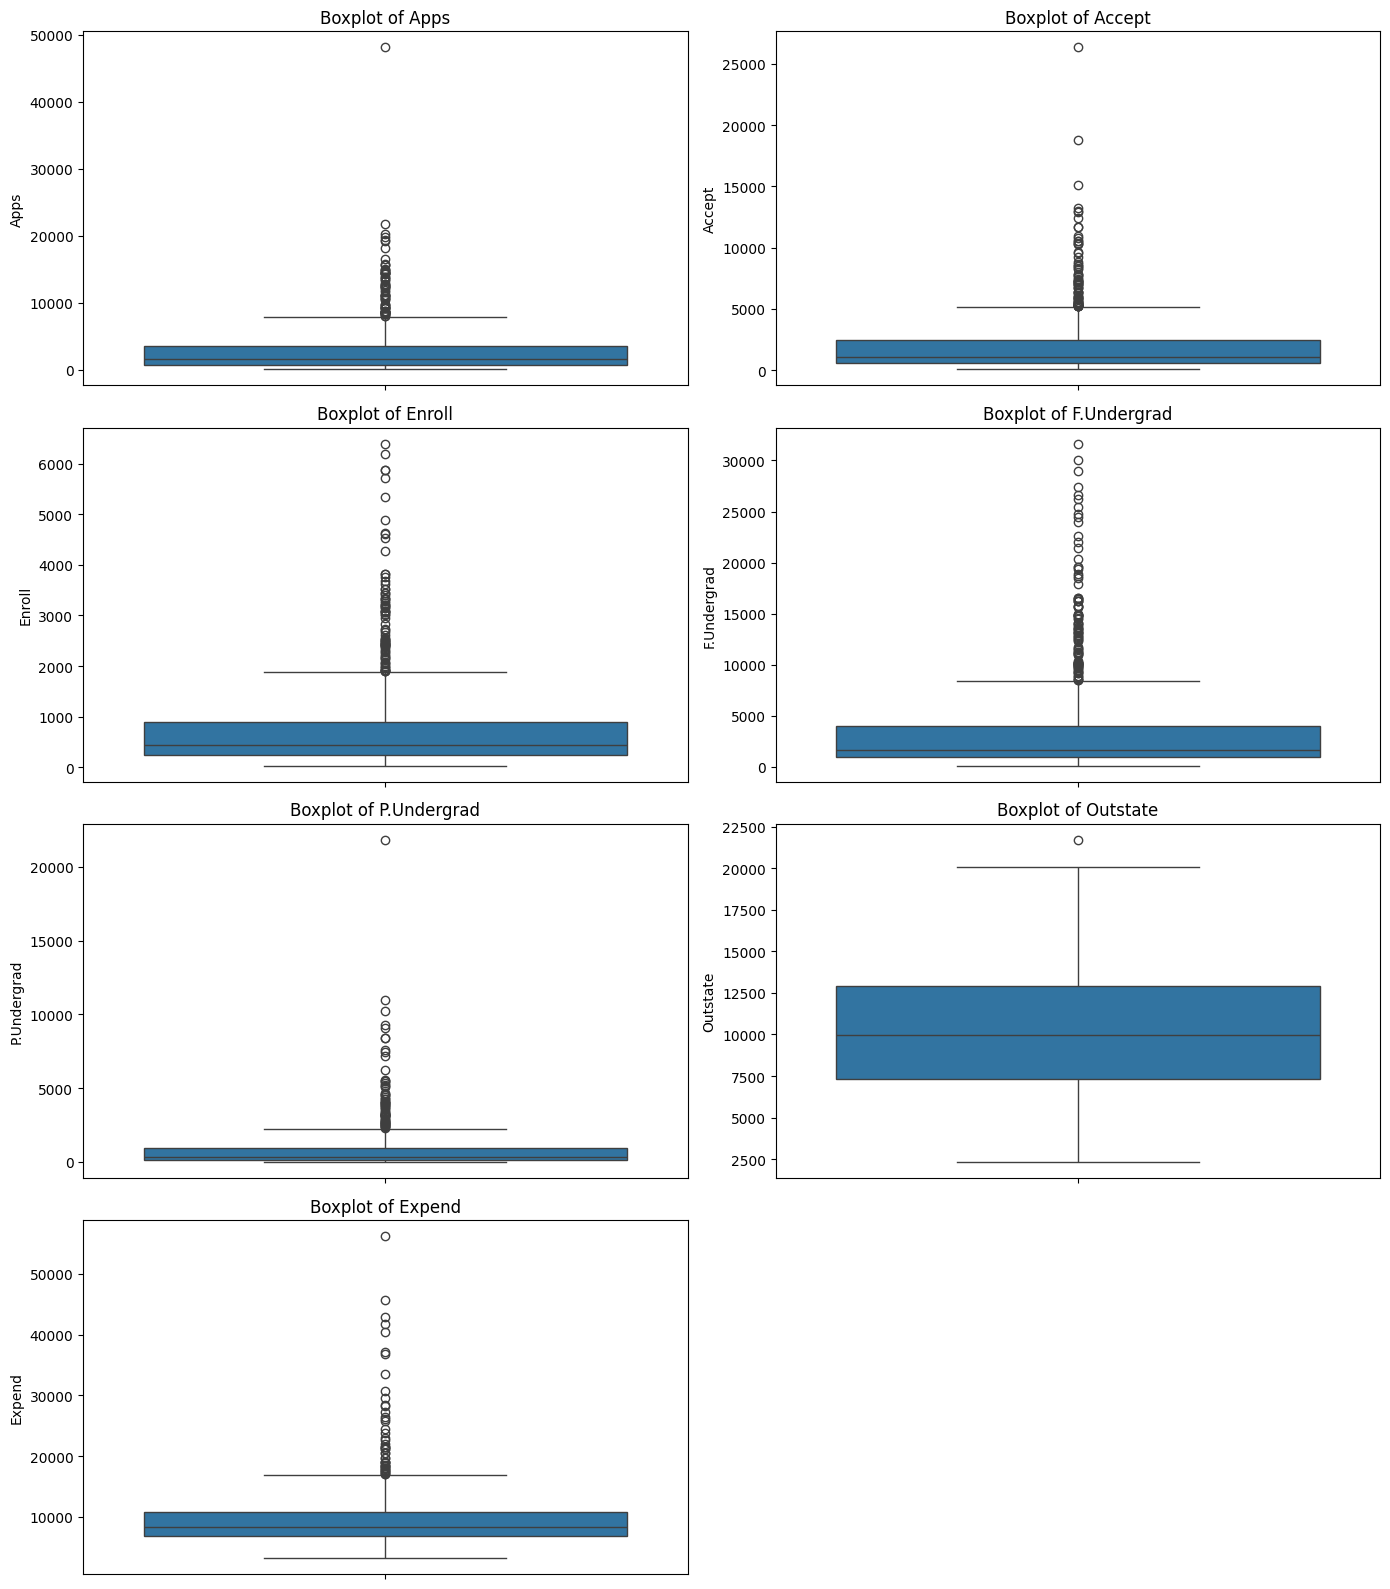

In [ ]:
nrows = math.ceil(len(suspected_numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(suspected_numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Conclusion of Step 8**

From the above visualizations,
* In histogram, most of the data points are concentrated on the lower end, with a few larger values pulling the mean to the right.
* In box plot, 
    - The median line is even little closer to the bottom of the box.
    - The space of the upper whisker is longer than the lower whisker.
    - Few Bubbles are plotted outside of the whisker which are actually the outliers

Therefore, we conclude that the `Apps`, `Accept`, `Enroll`, `F.Undergrad`, `P.Undergrad`, `Expend` attribute also has **potential outliers**


Plausible Extreme Value in `Outstate` Tuition:
* While the `Outstate` tuition boxplot clearly shows a distinct outlier (and its histogram exhibits a slight right-skewness due to it), this extreme value is interpreted as a legitimate data point representing a highly expensive institution, rather than a data error.
* Its presence highlights the significant range in tuition costs among the colleges.
* This observation suggests that
    * For linear-based ML models, data transformation (e.g., a log transformation) may be beneficial for this variable during the preprocessing phase.
    * For Tree-based models, compare between data transformed and original data.
* This would mitigate its disproportionate influence on certain machine learning models, ensuring the model's robustness for the majority of institutions.

-----------------------
### 9. Exploratory Data Analysis (EDA)

**9a. Univariate Analysis: Analysis on Categorical Variables `Private`**

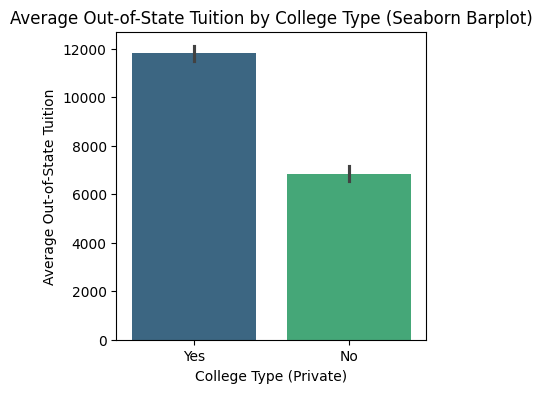

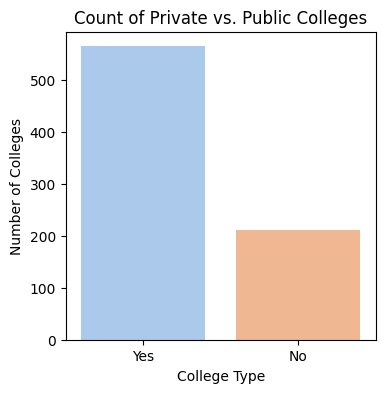

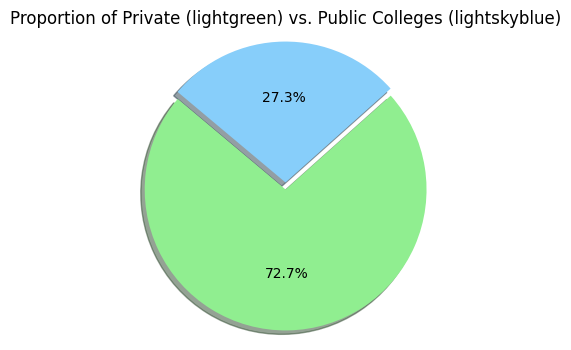

In [11]:
# --- 1. Bar Chart ---
plt.figure(figsize=(4, 4))
sns.barplot(x='Private', y='Outstate', data=college, palette='viridis', legend=False, hue='Private')
plt.title('Average Out-of-State Tuition by College Type (Seaborn Barplot)')
plt.xlabel('College Type (Private)')
plt.ylabel('Average Out-of-State Tuition')
plt.show()


# --- 2. Count Plot ---
plt.figure(figsize=(4, 4))
sns.countplot(x='Private', data=college, palette='pastel', hue='Private', legend=False)
plt.title('Count of Private vs. Public Colleges')
plt.xlabel('College Type')
plt.ylabel('Number of Colleges')
plt.show()


# --- 3. Pie Chart ---
private_counts = college['Private'].value_counts()
labels = private_counts.index
sizes = private_counts.values
colors = ['lightgreen', 'lightskyblue']
explode = (0.05, 0)

plt.figure(figsize=(4, 4))
plt.pie(sizes, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Private (lightgreen) vs. Public Colleges (lightskyblue)')
plt.axis('equal')
plt.show()

**Conclusion of Step 9a**

We have `private` categorical column which says
- There are significantly more private colleges (72.7%) than public colleges (27.3%) in this dataset.
- Private colleges, on average, have much higher out-of-state tuition than public colleges.
- The dataset is imbalanced, with a higher proportion of private institutions. This is crucial to build a classification model to predict 'Private' status, as imbalanced data can affect model performance.
- These charts can be used for presentation of data based on the requirement for the future use.

We have already done the univariate analysis for some numerical variables and confirmed the distribution of each of them and clearly identified the presence of outliers.

**9b. Univariate Analysis: Analysis on numerical Variables**

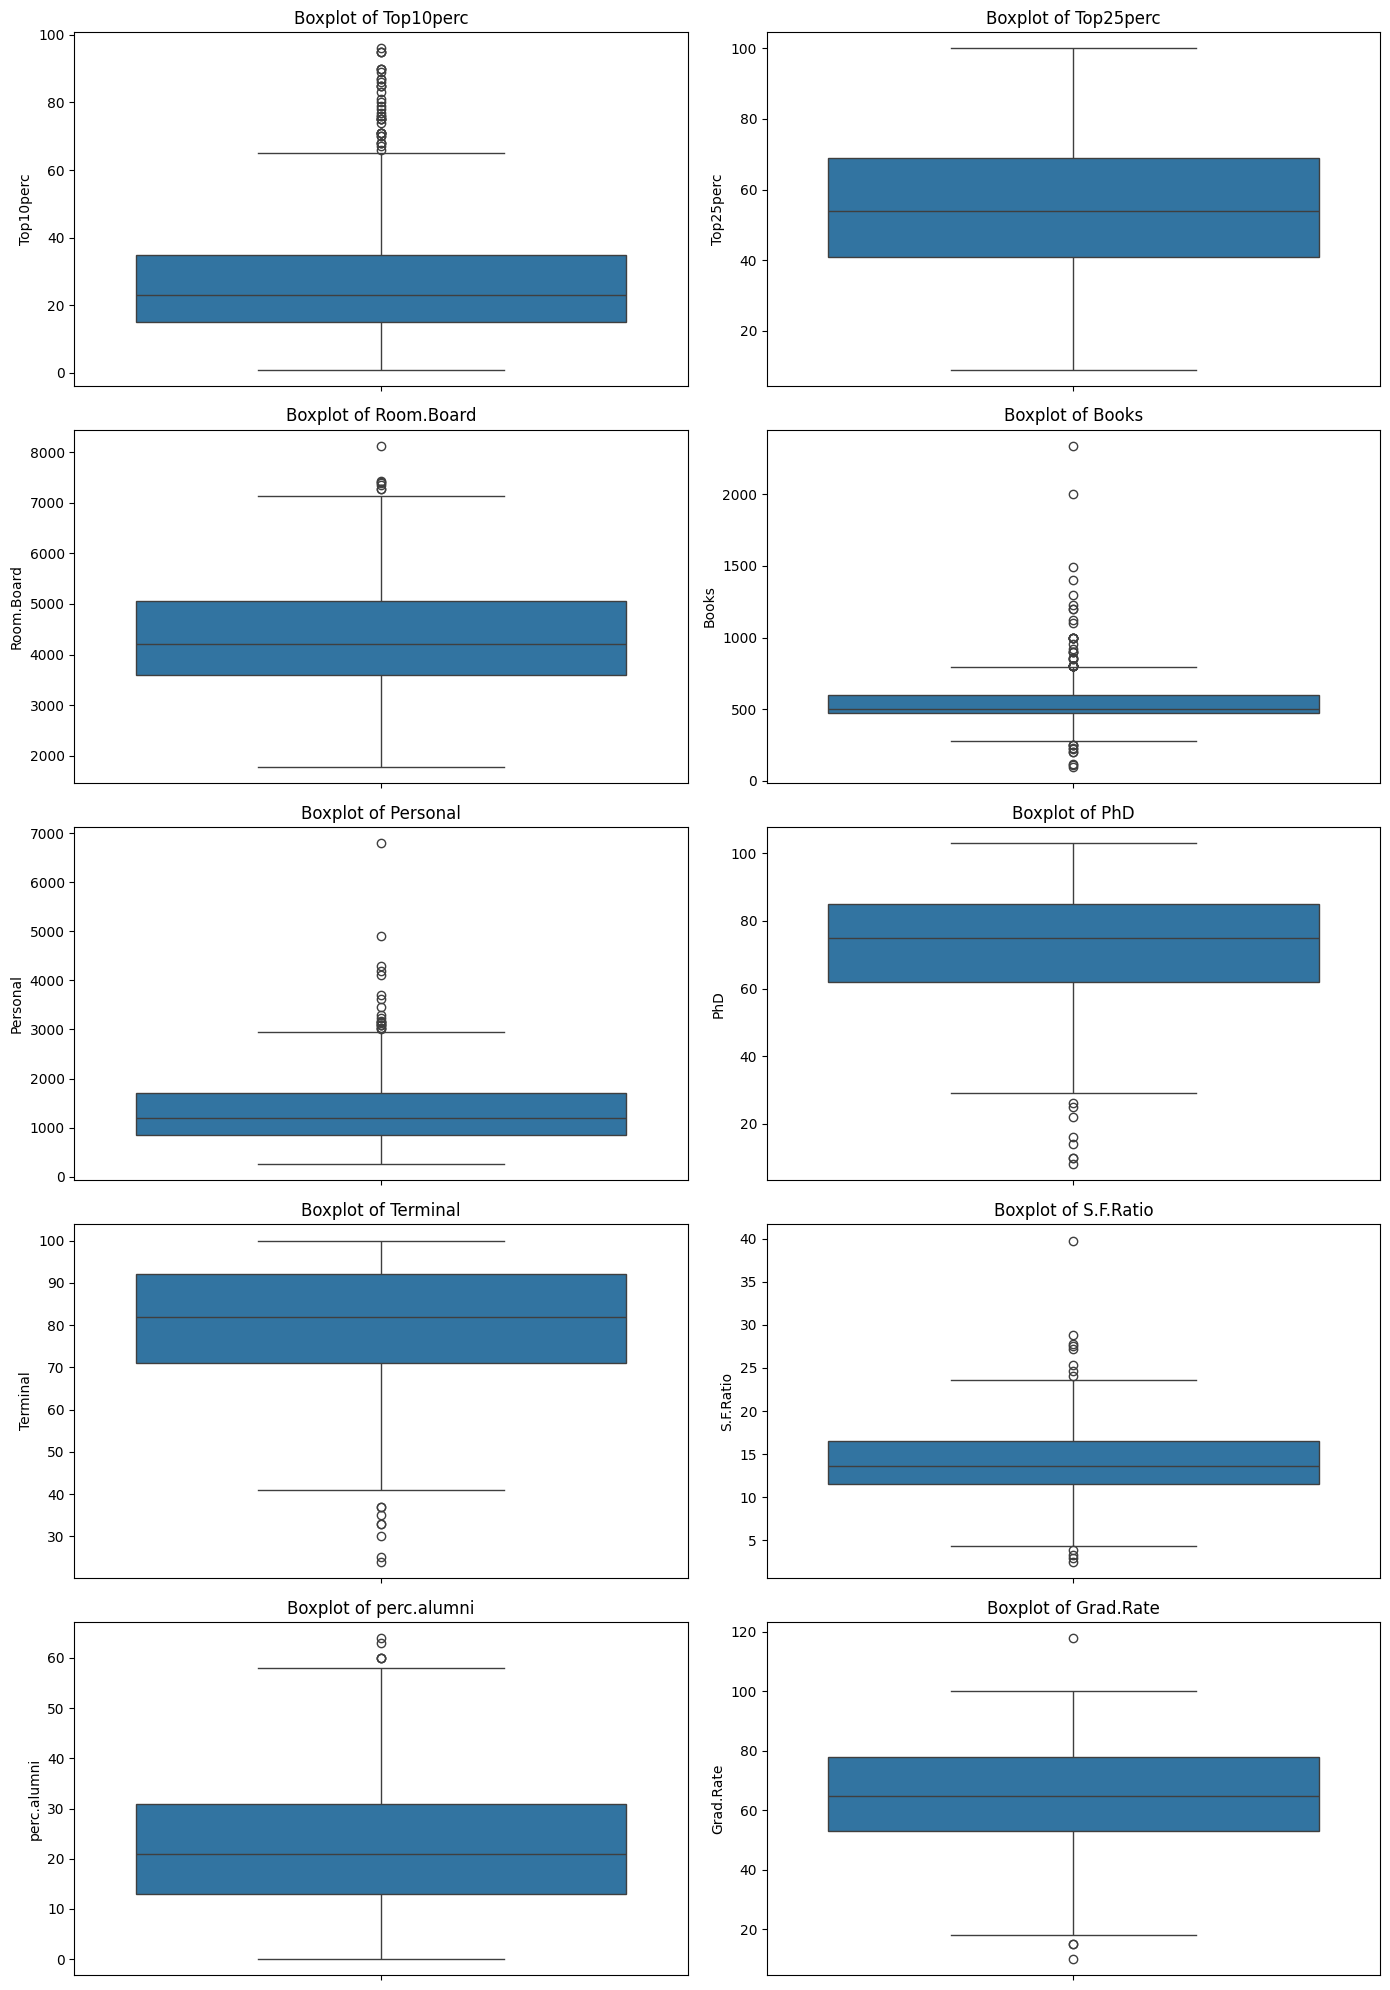

In [14]:
other_numerical_cols = ['Top10perc', 'Top25perc', 'Room.Board', 'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Grad.Rate']

i= 0
nrows = math.ceil(len(other_numerical_cols) / 2)
plt.figure(figsize=(14, nrows * 4))

for i, col in enumerate(other_numerical_cols):
    plt.subplot(nrows, 2, i + 1)
    sns.boxplot(y=college[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

**Conclusion of Step 9b**

Beyond initial statistical checks, detailed univariate analysis using boxplots revealed the presence of additional, significant outliers in several key numerical attributes, including `Top10perc`, `Room.Board`, `Books`, `Personal`, `PhD`, `Terminal`, `S.F.Ratio`, and `perc.alumni`.

While these outliers were not always flagged by summary statistics (like Coefficient of Variation or skewness thresholds), their clear visibility in the boxplots emphasizes their presence as extreme values. These points, largely representing plausible but exceptionally high or low characteristics of certain institutions, suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on machine learning model performance and to normalize feature distributions.

**10a. Explore Relationship between variables: Correlation Coefficient Heatmap**

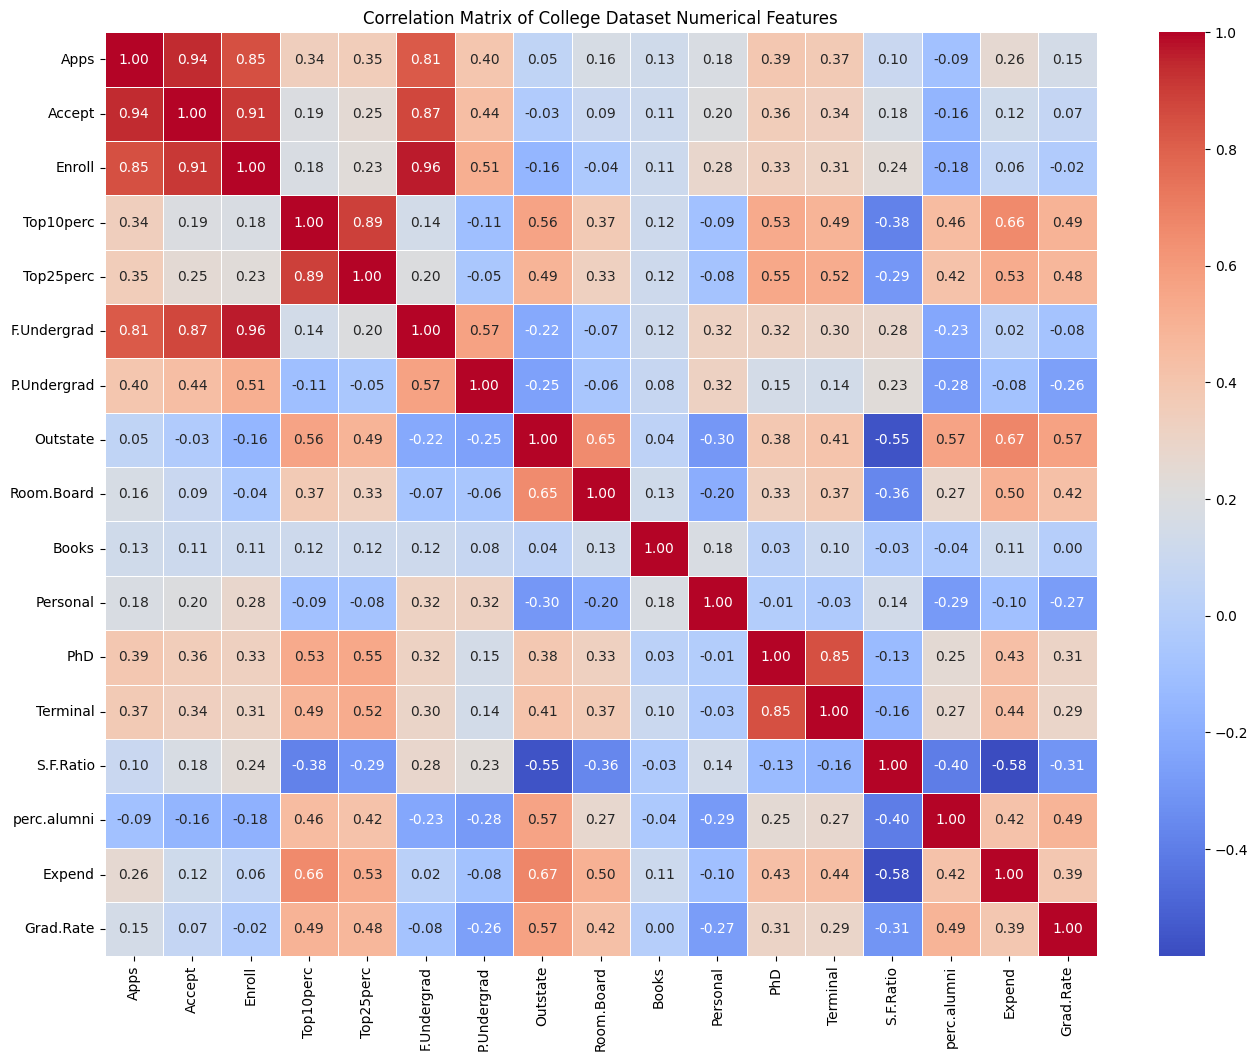

In [13]:
numerical_cols = college.select_dtypes(include=np.number).columns

# Calculate the correlation matrix
correlation_matrix = college[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of College Dataset Numerical Features')
plt.show()

**Conclusion of Step 10a**

So, From the above correlation coefficient Heatmap, we can infer that,
* As attribute `Apps` increases `Accept` also increases => Which means, colleges receiving more applications tend to accept a greater number of students.
* Similarly,
    - `Accept` increases -> `Enroll` will also increase
    - `Apps`, or `Accept` or 'Enroll` increases -> `F.Undergrad` will also increase => No. of Full-time Undergraduates increases because they are enrolling more. larger institutions, characterized by higher application and acceptance volumes, generally have a greater number of full-time undergraduate students
    - `PhD` increases -> `Terminal` increases -> Faculties with Terminal degree are growing as lot of students studies PhD increases.
    - `S.F.Ration` decreases -> `Expend` increases -> As the student-to-faculty ratio decreases (meaning more faculty per student, or smaller class sizes), the instructional expenditure per student tends to increase.

**10b. Bivariate Analysis: Numerical Vs Numerical (with hue='Private')**


--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---


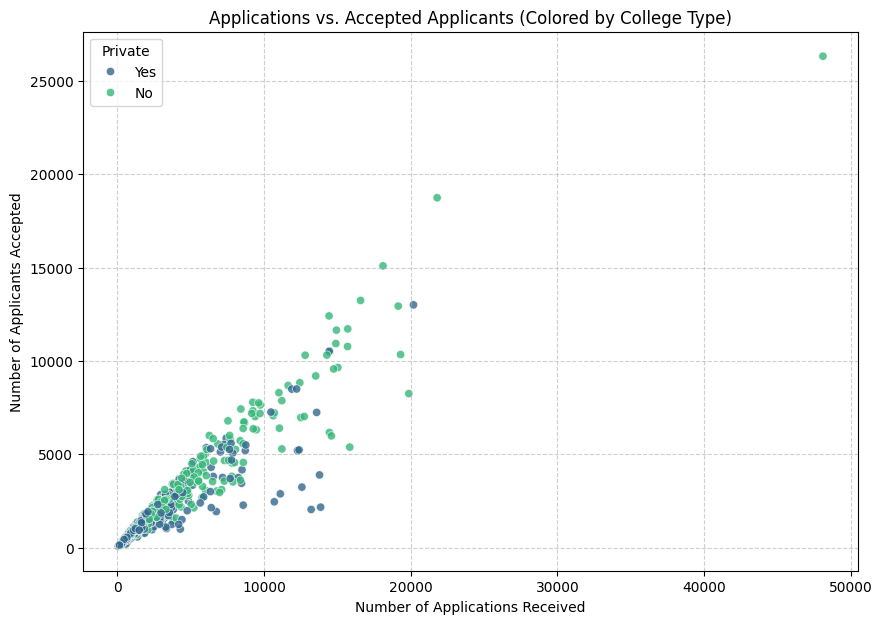

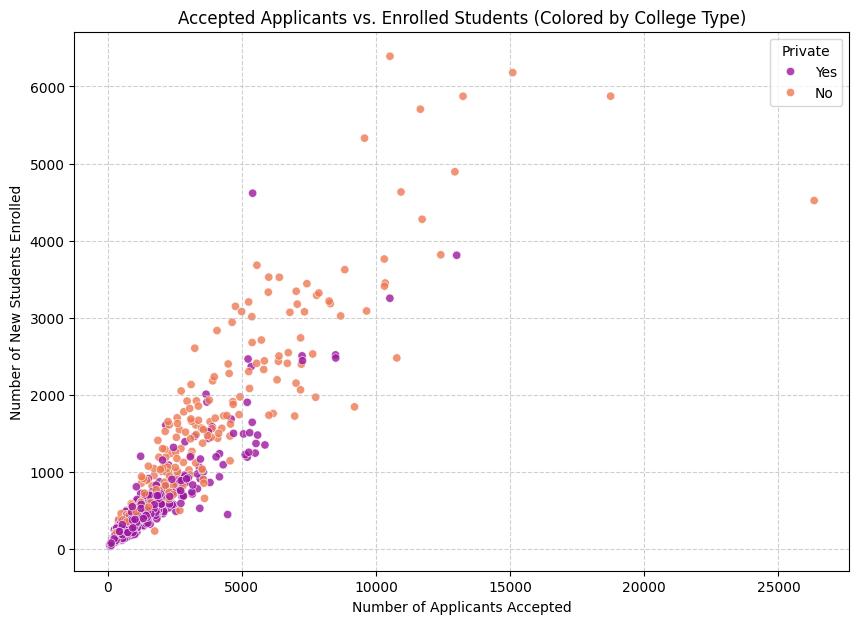

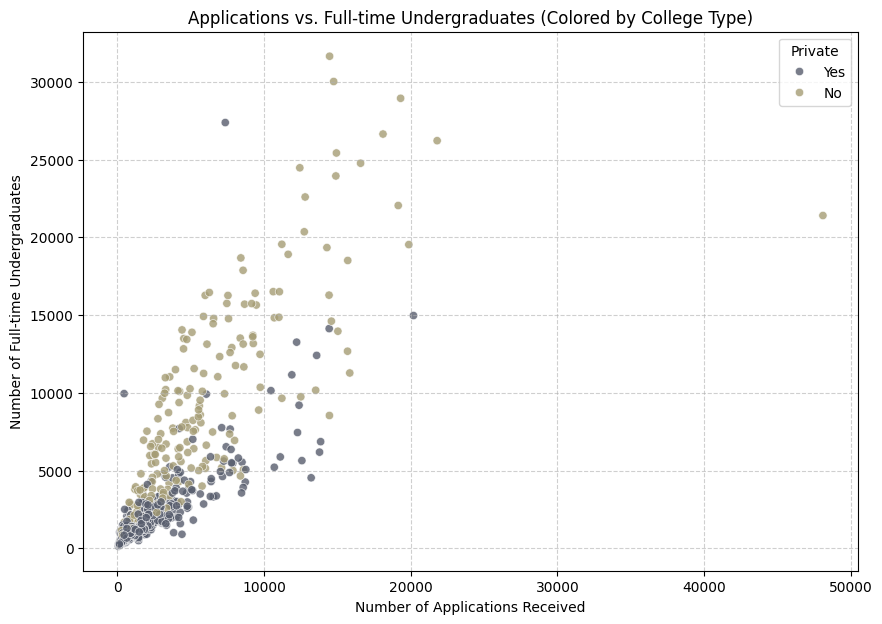

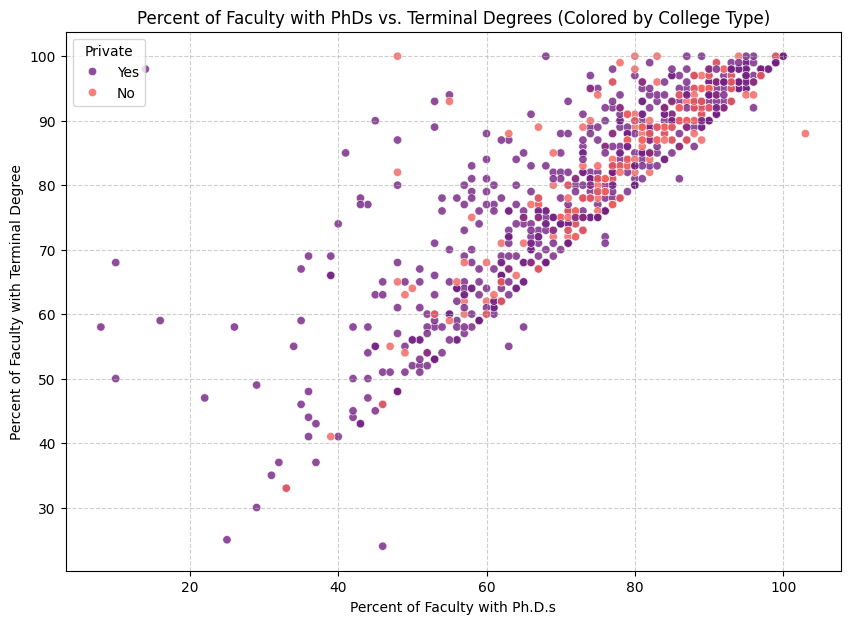

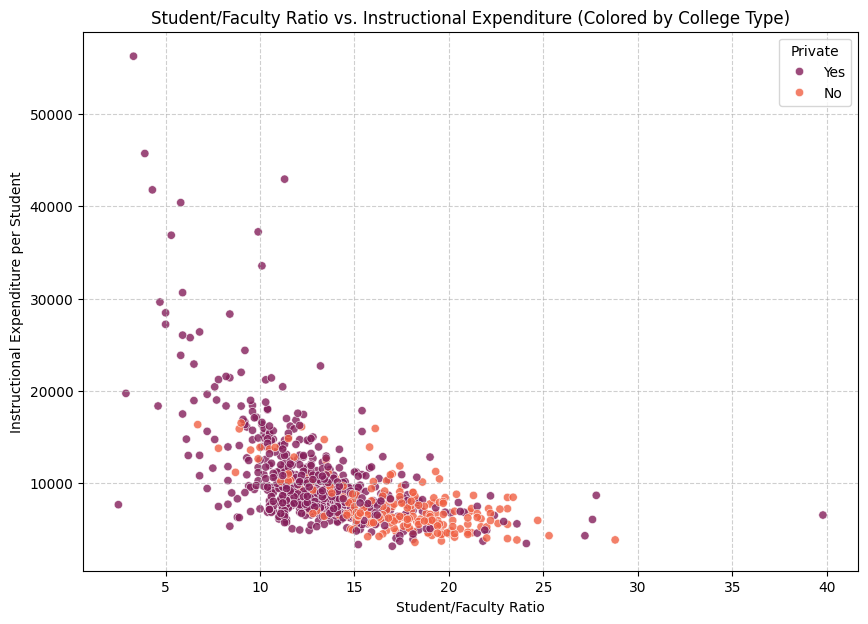

In [15]:
print("\n--- Bivariate Analysis: Numerical vs. Numerical (with hue='Private') ---")

# 1. Apps vs. Accept
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Apps', y='Accept', data=college, hue='Private', palette='viridis', alpha=0.8)
plt.title('Applications vs. Accepted Applicants (Colored by College Type)')
plt.xlabel('Number of Applications Received')
plt.ylabel('Number of Applicants Accepted')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 2. Accept vs. Enroll
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Accept', y='Enroll', data=college, hue='Private', palette='plasma', alpha=0.8)
plt.title('Accepted Applicants vs. Enrolled Students (Colored by College Type)')
plt.xlabel('Number of Applicants Accepted')
plt.ylabel('Number of New Students Enrolled')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 3. Apps vs. F.Undergrad (Representative of Apps/Accept/Enroll vs. F.Undergrad)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='Apps', y='F.Undergrad', data=college, hue='Private', palette='cividis', alpha=0.8)
plt.title('Applications vs. Full-time Undergraduates (Colored by College Type)')
plt.xlabel('Number of Applications Received')
plt.ylabel('Number of Full-time Undergraduates')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 4. PhD vs. Terminal
plt.figure(figsize=(10, 7))
sns.scatterplot(x='PhD', y='Terminal', data=college, hue='Private', palette='magma', alpha=0.8)
plt.title('Percent of Faculty with PhDs vs. Terminal Degrees (Colored by College Type)')
plt.xlabel('Percent of Faculty with Ph.D.s')
plt.ylabel('Percent of Faculty with Terminal Degree')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 5. S.F.Ratio vs. Expend
plt.figure(figsize=(10, 7))
sns.scatterplot(x='S.F.Ratio', y='Expend', data=college, hue='Private', palette='rocket', alpha=0.8)
plt.title('Student/Faculty Ratio vs. Instructional Expenditure (Colored by College Type)')
plt.xlabel('Student/Faculty Ratio')
plt.ylabel('Instructional Expenditure per Student')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


--- Bivariate Analysis: Numerical vs. Categorical (using Box Plots) ---


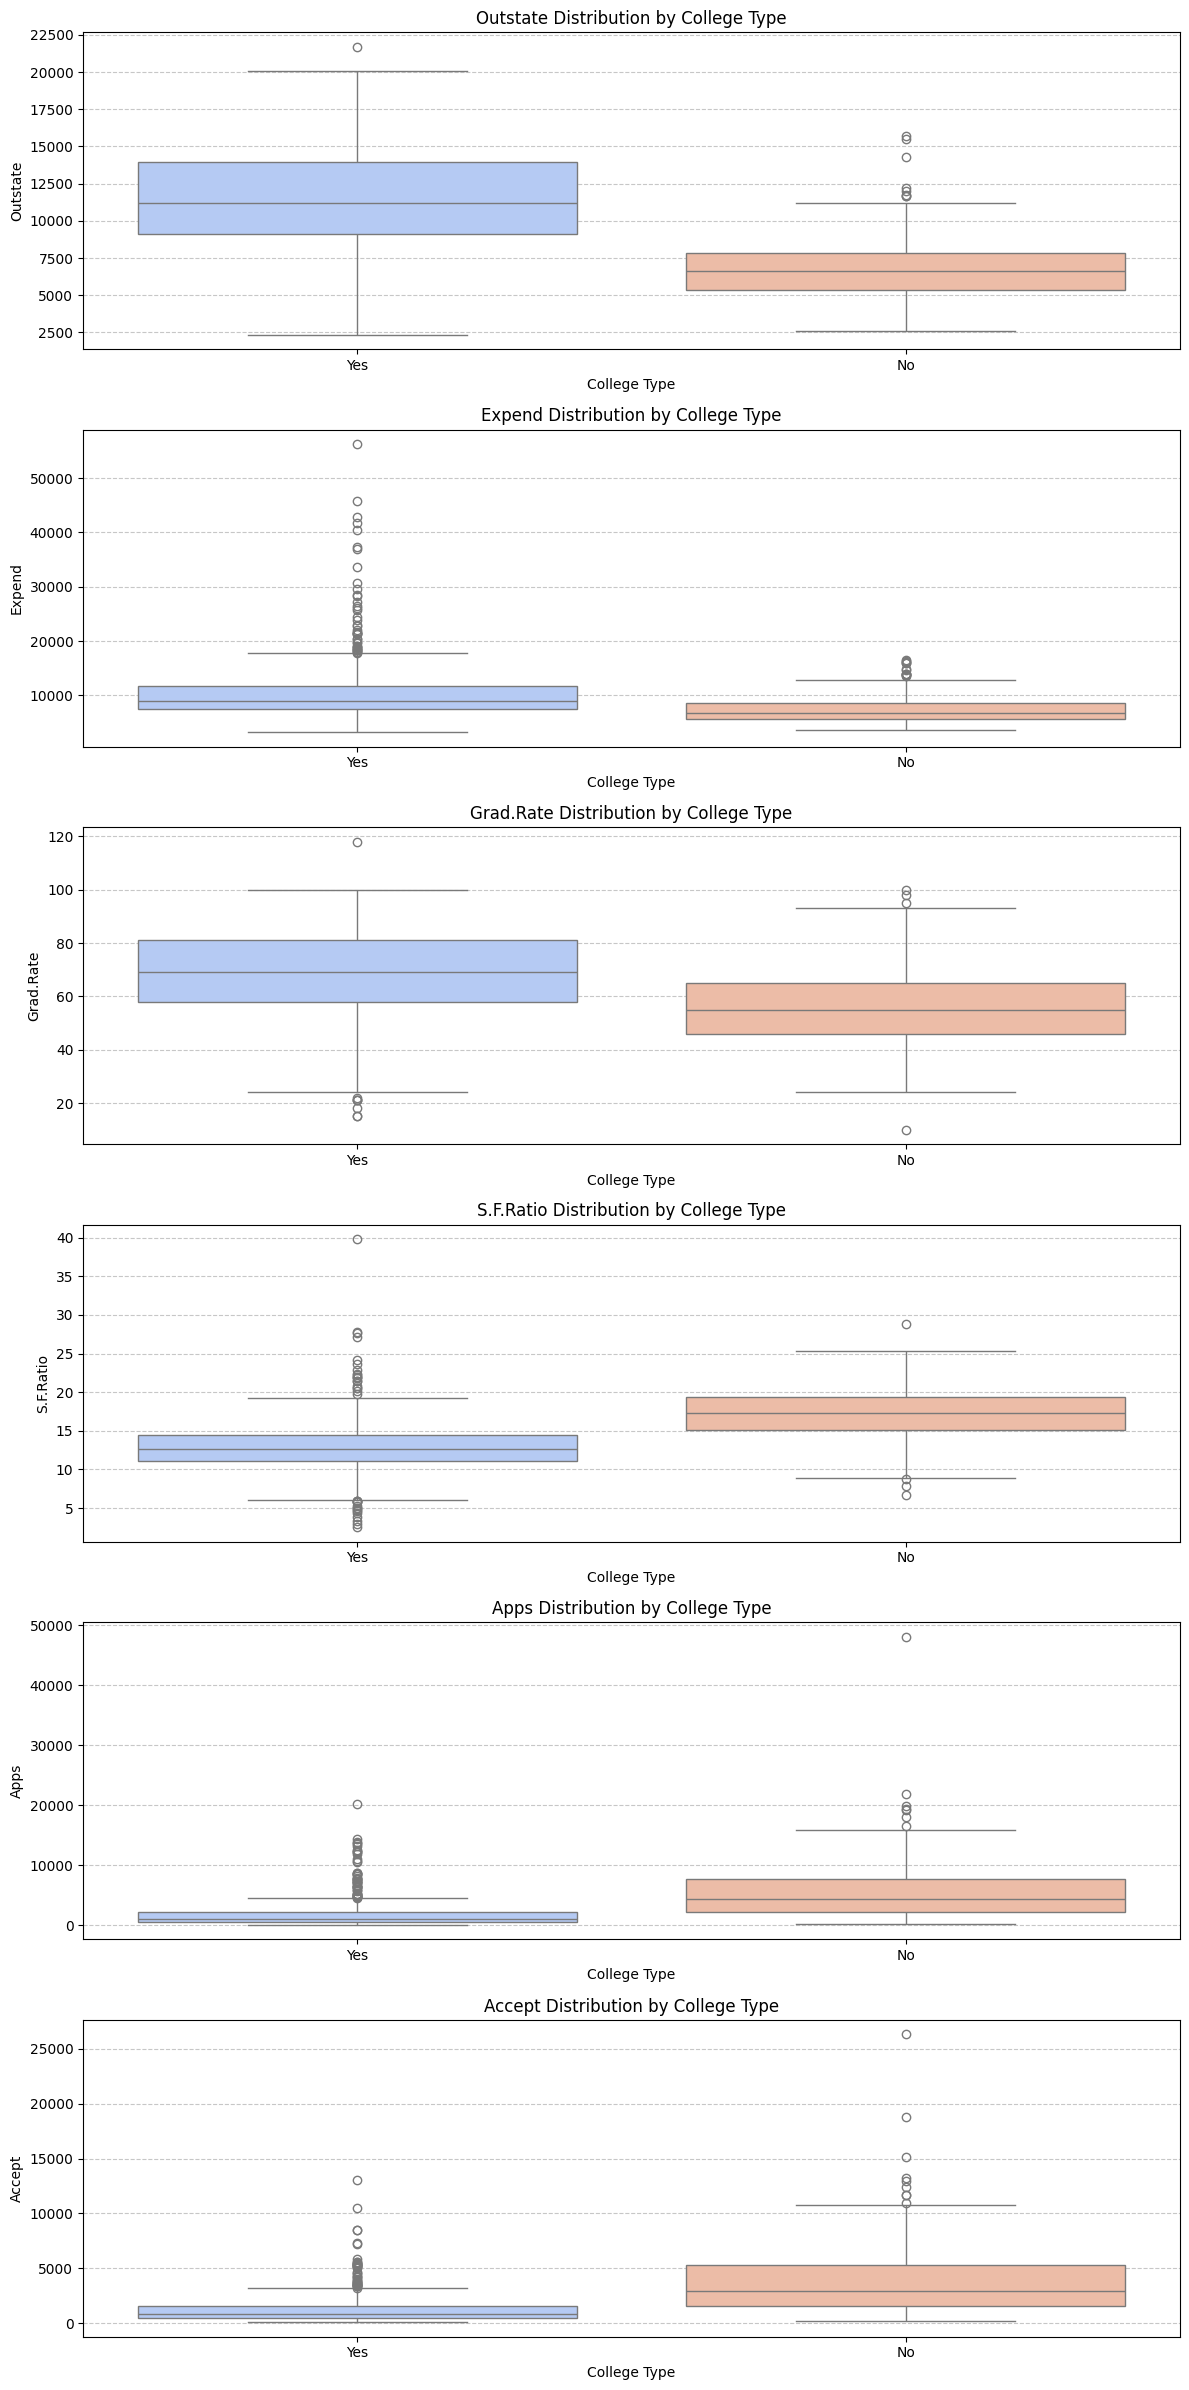

In [17]:
print("\n--- Bivariate Analysis: Numerical vs. Categorical (using Box Plots) ---")

variables_to_compare = ['Outstate', 'Expend', 'Grad.Rate', 'S.F.Ratio', 'Apps', 'Accept']

plt.figure(figsize=(12, len(variables_to_compare) * 4)) # Adjust figure height dynamically

for i, var in enumerate(variables_to_compare):
    plt.subplot(len(variables_to_compare), 1, i + 1) # One column of plots
    sns.boxplot(x='Private', y=var, data=college, palette='coolwarm', hue='Private')
    plt.title(f'{var} Distribution by College Type')
    plt.xlabel('College Type')
    plt.ylabel(var)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### **OVERALL SUMMARY:**

* All attributes have 777 entries, indicating **no missing values** for any of the numerical features.
* Also, Attribute `Grad.Rate` has maximum value of 118 typically says that there is obvious **data errors** since graduation rate cannot exceed 100%
----

**Identifying Presence Of Potential Outliers:**

From observation of statistical data, we Suspect the presence of outliers in the following attributes = **['Apps', 'Accept', 'Enroll', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Expend']**. So, Steps have taken and confirmed the **presence of Outliers** by observing the following results.
* Coefficient of Variation **(COV)** of every attribute in the above list is higher, **Mean > Median > Mode** for every attribute of the list and further Skewness Coefficient for every attribute further shows their values are higher than 0.5. So, these attributes have potential outliers and **right-Skewed**. Meaning a few large institutions receive a disproportionately high number.
* Visualizations prove that the `Expend` attribute also has potential outliers
* Visualizations (univariate analysis) on `Top10perc`, `Room.Board`, `Books`, `Personal`, `PhD`, `Terminal`, `S.F.Ratio`, and `perc.alumni` has shown potential outliers beyond statistical checks.
* This suggest that careful consideration of data transformation (e.g., log scaling) will be essential during preprocessing to manage their potential impact on ML model performance and to normalize feature distributions.
----

**Finding Relationship between Variables**

So, From the above correlation coefficient Heatmap, we can infer that,
* As attribute `Apps` increases `Accept` also increases => Which means, colleges receiving more applications tend to accept a greater number of students.
* Similarly,
    - `Accept` increases -> `Enroll` will also increase
    - `Apps`, or `Accept` or 'Enroll` increases -> `F.Undergrad` will also increase => No. of Full-time Undergraduates increases because they are enrolling more. larger institutions, characterized by higher application and acceptance volumes, generally have a greater number of full-time undergraduate students
    - `PhD` increases -> `Terminal` increases -> Faculties with Terminal degree are growing as lot of students studies PhD increases.
    - `S.F.Ration` decreases -> `Expend` increases -> As the student-to-faculty ratio decreases (meaning more faculty per student, or smaller class sizes), the instructional expenditure per student tends to increase.

Even with a strong correlation, correlation does not imply causation. Just because two variables move together doesn't mean one causes the other. There might be a third, unobserved factor, or the relationship might just be coincidental. Further analysis is needed to find the relationships.